In [2]:
library(tidyverse)
library(reshape2)
options(scipen = 999)

In [3]:
#sets up the nessesary categories
df <- read_csv("combined ideology.csv", col_types = cols(
  X1 = col_double(),
  Category = col_factor(),
  `Current Channel` = col_factor(),
  `Current Video` = col_character(),
  `Current Views` = col_double(),
  `Next Channel` = col_factor(),
  Count = col_double(),
  CHANNEL_TITLE = col_factor(),
  IDEOLOGY = col_factor()
)) %>% select(-`X1`) %>% rename(c("Next Ideology" = IDEOLOGY,"Current Ideology" = Category))


head(df)

Warning message:
"Missing column names filled in: 'X1' [1]"

Current Ideology,Current Channel,Current Video,Current Views,Next Channel,Count,CHANNEL_TITLE,Next Ideology
Alt-light,The Fallen State,Jesse Asks L*beral Guest: Why Are You So Easily TRIGGERED? (Highlight),84226,The Fallen State,3,The Fallen State,Alt-light
Alt-light,The Fallen State,Jesse Asks L*beral Guest: Why Are You So Easily TRIGGERED? (Highlight),84226,British GQ,1,NA,NA
Alt-light,The Fallen State,Jesse Asks L*beral Guest: Why Are You So Easily TRIGGERED? (Highlight),84226,LoL Mobile Gaming,1,NA,NA
Alt-light,The Fallen State,Jesse Asks L*beral Guest: Why Are You So Easily TRIGGERED? (Highlight),84226,Skavlan,1,Skavlan,NA
Alt-light,The Fallen State,Jesse Asks L*beral Guest: Why Are You So Easily TRIGGERED? (Highlight),84226,Destiny,2,Destiny,Partisan Left
Alt-light,The Fallen State,Jesse Asks L*beral Guest: Why Are You So Easily TRIGGERED? (Highlight),84226,Get a Job,1,NA,NA


In [4]:
#sets up impressions: (views)(recommendations)/recommendations sampled
df <- df %>% group_by(`Current Video`) %>% mutate(total = sum(Count)) %>% mutate(Impressions = `Current Views` * Count/total) %>% select(-total)
df

Current Ideology,Current Channel,Current Video,Current Views,Next Channel,Count,CHANNEL_TITLE,Next Ideology,Impressions
Alt-light,The Fallen State,Jesse Asks L*beral Guest: Why Are You So Easily TRIGGERED? (Highlight),84226,The Fallen State,3,The Fallen State,Alt-light,25267.8
Alt-light,The Fallen State,Jesse Asks L*beral Guest: Why Are You So Easily TRIGGERED? (Highlight),84226,British GQ,1,NA,NA,8422.6
Alt-light,The Fallen State,Jesse Asks L*beral Guest: Why Are You So Easily TRIGGERED? (Highlight),84226,LoL Mobile Gaming,1,NA,NA,8422.6
Alt-light,The Fallen State,Jesse Asks L*beral Guest: Why Are You So Easily TRIGGERED? (Highlight),84226,Skavlan,1,Skavlan,NA,8422.6
Alt-light,The Fallen State,Jesse Asks L*beral Guest: Why Are You So Easily TRIGGERED? (Highlight),84226,Destiny,2,Destiny,Partisan Left,16845.2
Alt-light,The Fallen State,Jesse Asks L*beral Guest: Why Are You So Easily TRIGGERED? (Highlight),84226,Get a Job,1,NA,NA,8422.6
Alt-light,The Fallen State,Jesse Asks L*beral Guest: Why Are You So Easily TRIGGERED? (Highlight),84226,Sergio Michel,1,NA,NA,8422.6
Alt-light,Tree Of Logic,Democrats Received 90% of the Black Vote for the Midterm Elections 2018,14405,Tree Of Logic,1,Tree Of Logic,Alt-light,1440.5
Alt-light,Tree Of Logic,Democrats Received 90% of the Black Vote for the Midterm Elections 2018,14405,LastWeekTonight,2,LastWeekTonight,Social Justice,2881.0
Alt-light,Tree Of Logic,Democrats Received 90% of the Black Vote for the Midterm Elections 2018,14405,Global News,1,NA,NA,1440.5


In [5]:
# Amount of channels sampled per tag
channelsample <- df %>% group_by(`Current Ideology`,`Current Channel`) %>%
summarize() %>% ungroup() %>% mutate(temp = 1) %>% group_by(`Current Ideology`) %>%
summarize(`Channels Sampled`= sum(temp)) %>% filter(!is.na(`Current Ideology`))

In [8]:
#number of videos sampled per channel
vidsample <- df %>% group_by(`Current Ideology`,`Current Video`) %>% summarize() %>% ungroup() %>%
mutate(temp = 1) %>% group_by(`Current Ideology`) %>% summarize(`Videos Sampled` = sum(temp)) %>% filter(!is.na(`Current Ideology`))

channelsample %>% left_join(vidsample)

Joining, by = "Current Ideology"


Current Ideology,Channels Sampled,Videos Sampled
Alt-light,54,100
Alt-right,28,94
Anti-Theist,23,100
Anti-white,2,100
Conspiracy,48,100
IDW,62,100
Libertarian,31,100
MRA,18,100
Partisan Left,39,100
Partisan Right,39,100


In [6]:
#What do each Category send their most impressions to
df %>% filter(`Next Ideology` != "Others") %>% group_by(`Current Ideology`,`Next Ideology`) %>% summarize( Impressions = sum(`Impressions`)) %>%
filter(Impressions == max(Impressions), !is.na(`Current Ideology`)) %>% 
select(`Current Ideology`, `Next Ideology`, `Impressions`) %>% arrange(desc(Impressions))

Current Ideology,Next Ideology,Impressions
Partisan Left,Partisan Left,12735242.5
Social Justice,Social Justice,12189934.6
IDW,IDW,8617347.7
Anti-Theist,Anti-Theist,6622089.4
Alt-light,Alt-light,6403036.4
Socialist,Socialist,3063216.9
Partisan Right,Partisan Right,1756422.3
Revolutionary Socialist,Revolutionary Socialist,1603883.8
Libertarian,Libertarian,1551431.8
Conspiracy,Conspiracy,1486037.5


In [7]:
#tags back to itself 

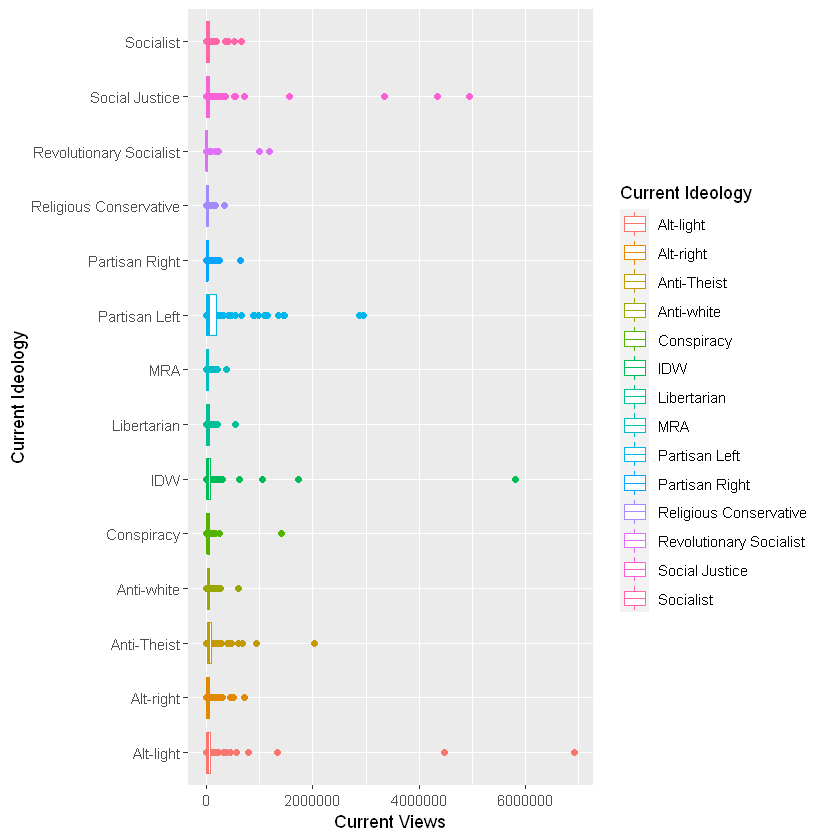

In [9]:
#average views for each category - LATENIGHTTALKSHOW
views <- df %>% group_by(`Current Ideology`,`Current Video`,`Current Views`) %>% summarize() %>% filter(!is.na(`Current Views`))
views %>% ggplot(aes(x=`Current Ideology`, y = `Current Views`, color = `Current Ideology`)) + geom_point() + geom_boxplot() + coord_flip()

Warning message:
"Removed 20 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 20 rows containing missing values (geom_point)."

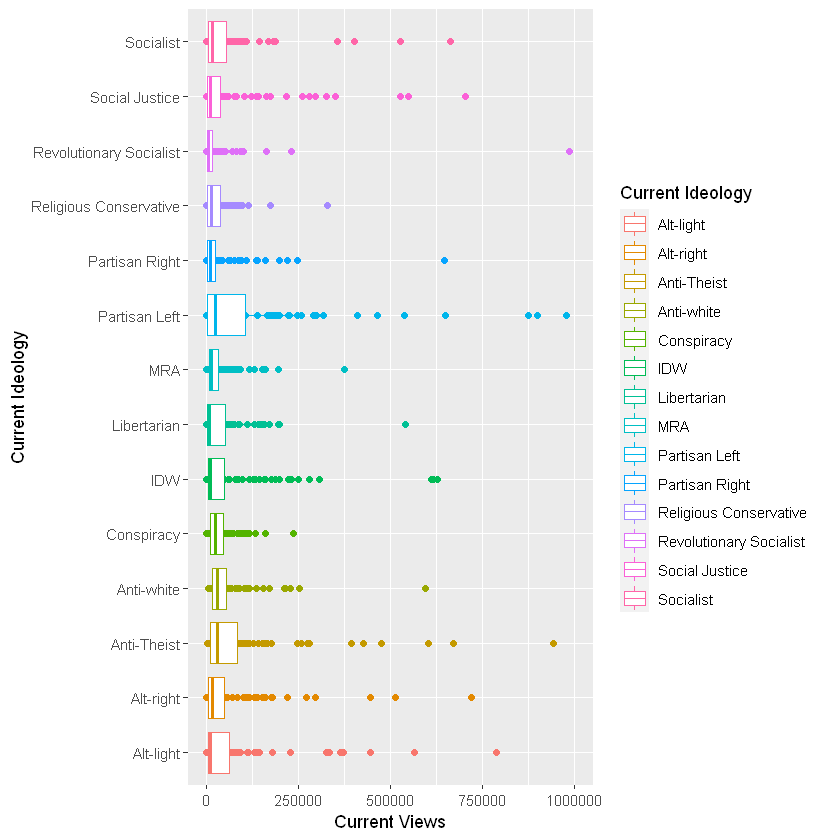

In [10]:
#average views for each category - NO LATENIGHTTALKSHOW
views %>% ggplot(aes(x=`Current Ideology`, y = `Current Views`, color = `Current Ideology`)) + geom_point() +
geom_boxplot() + coord_flip() + ylim(0,1000000)

In [11]:
#distribution of sent impressionss
#df %>% 

Using Current Ideology as id variables


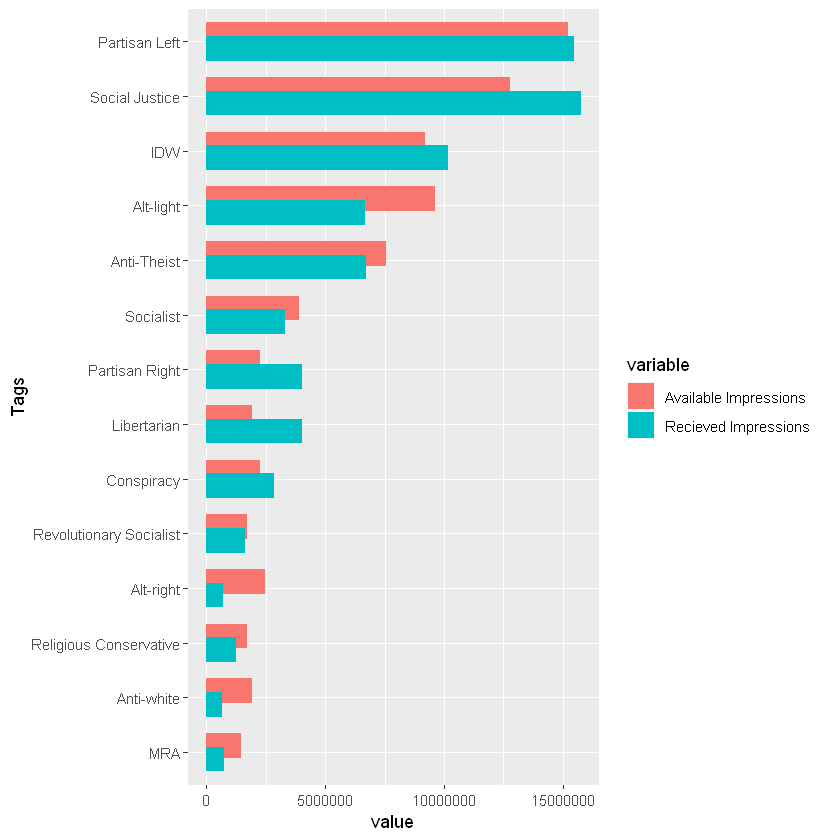

In [15]:
impressions <- df %>% filter(`Next Ideology` != "Others") %>% group_by(`Current Ideology`) %>% mutate(`Available Impressions` = sum(Impressions)) %>%
ungroup() %>% group_by(`Next Ideology`) %>% mutate(`Recieved Impressions` = sum(Impressions)) %>% ungroup() %>%
filter(`Current Ideology` == `Next Ideology`) %>% select(`Current Ideology`,`Available Impressions`,`Recieved Impressions`) %>%
unique() 

impressions %>% melt(vars = `Current Ideology`) %>% 
ggplot(aes(x = reorder(`Current Ideology`,`value`),y = value)) + geom_bar(aes(fill = variable), stat = "identity",
                                           position = position_dodge(width = -0.5)) +coord_flip() + xlab("Tags")

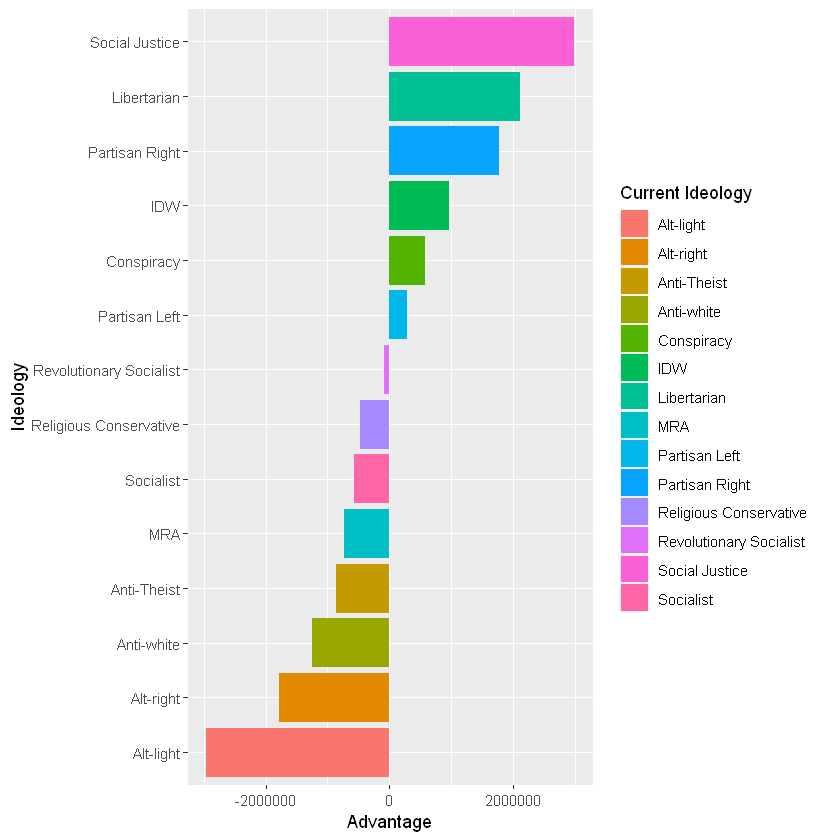

In [19]:
impressions %>% mutate(Advantage = `Recieved Impressions` - `Available Impressions`) %>%
ggplot(aes(x= reorder(`Current Ideology`,Advantage), y = Advantage)) + geom_bar(stat = "identity", aes(fill = `Current Ideology`)) +
coord_flip() + xlab("Ideology")

[1] "Jesse Asks L*beral Guest: Why Are You So Easily TRIGGERED? (Highlight)"